In [31]:
import os
from pathlib import Path

from PIL import Image

from fastai.data.transforms import get_image_files

In [34]:
images_dir = Path('images')
winnie_pooh_dir = images_dir / 'winnie_the_pooh'
vinnie_pookh_dir = images_dir / 'vinnie_pookh'

In [35]:
fns = get_image_files(images_dir)

In [36]:
fns

(#156) [Path('images/vinnie_pookh/1.1400x0.jpg'),Path('images/vinnie_pookh/1.180803-winkelman-soviet-winnie-the-pooh-films-hero_ctwmwx.jpg'),Path('images/vinnie_pookh/10.718179_1_win_big.jpg'),Path('images/vinnie_pookh/10.hqdefault.jpg'),Path('images/vinnie_pookh/11.136388_original-e1449764256789.jpg'),Path('images/vinnie_pookh/11.51jkag-zhml._sx331_bo1,204,203,200_.jpg'),Path('images/vinnie_pookh/12.096.jpg'),Path('images/vinnie_pookh/12.7d1a649611a714e3e1dd8d95d0239d.jpg'),Path('images/vinnie_pookh/13.3_d58e6fae.jpg'),Path('images/vinnie_pookh/14.pesenka-vinni-puha.jpg')...]

In [37]:
verify_images(fns)

(#0) []

In [38]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [39]:
dls = bears.dataloaders(images_dir)

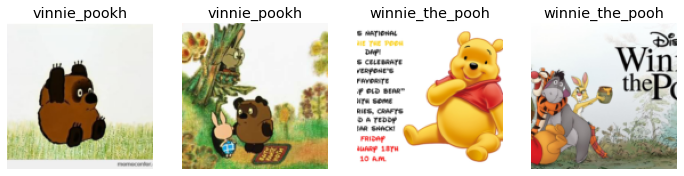

In [40]:
dls.valid.show_batch(max_n=4, nrows=1)

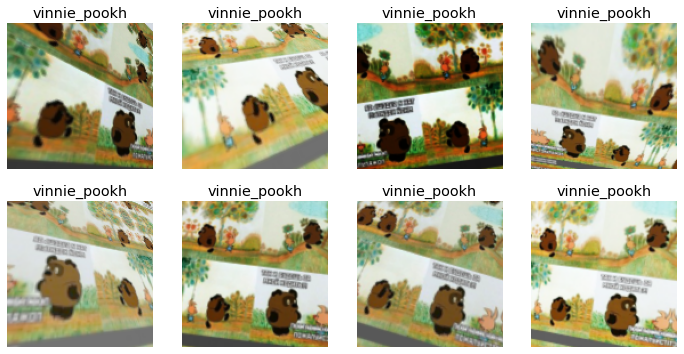

In [59]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(images_dir)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [60]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(images_dir)

/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


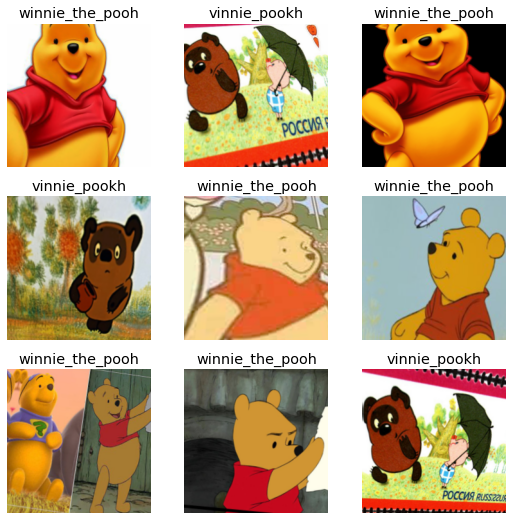

In [61]:
dls.show_batch()

In [62]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

In [63]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.135863,1.783460,0.580645,00:04


epoch,train_loss,valid_loss,error_rate,time
0,1.033772,1.449992,0.580645,00:04
1,1.018522,0.977422,0.483871,00:03
2,0.885412,0.441752,0.258065,00:03
3,0.744530,0.222696,0.096774,00:03
4,0.634434,0.170400,0.064516,00:04
5,0.571085,0.110255,0.064516,00:03
6,0.504552,0.073534,0.032258,00:03
7,0.449076,0.049189,0.032258,00:03
8,0.407075,0.040037,0.032258,00:03
9,0.380699,0.035246,0.032258,00:04


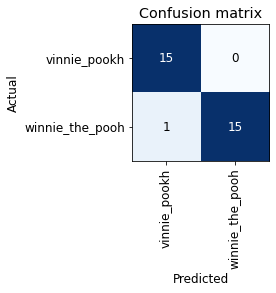

In [64]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

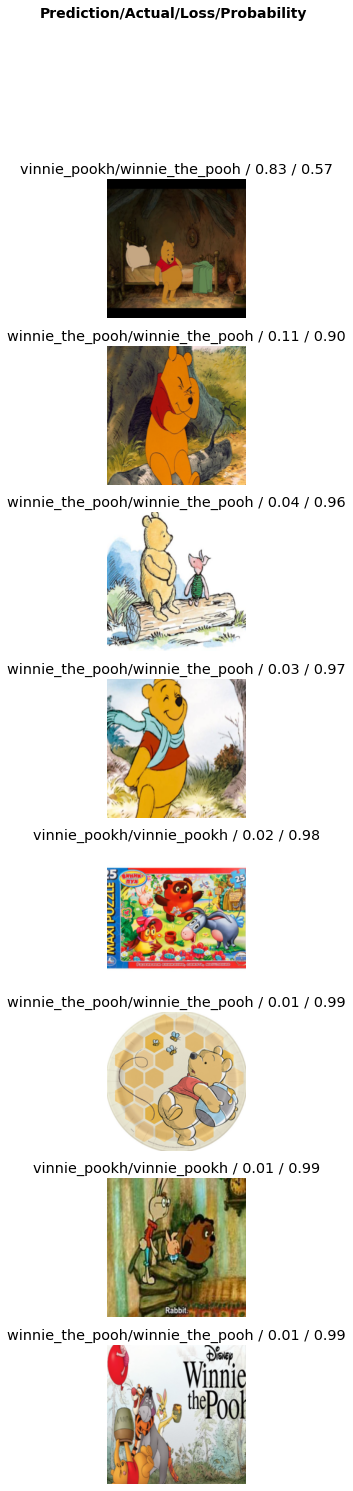

In [66]:
interp.plot_top_losses(8, nrows=8)